## Lead Scoring Case Study
#### PROBLEM STATEMENT
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

#### Essentially, the company wants:

To build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 
The target lead conversion rate to be around 80%

### Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
pd.set_option('display.max_rows', None) #so that large dataframes can be seen in output wholely
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing all datasets
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Preparation

- Checking for duplicates

In [7]:
sum(df.duplicated(subset='Prospect ID')) == 0

True

In [8]:
sum(df.duplicated(subset='Lead Number')) == 0

True

- Checking null values

In [9]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Dropping columns having null values more than 40%

In [11]:
cols = df.columns
for i in cols:
    if(100*(df[i].isnull().sum()/len(df.index)) >=40):
        df.drop(i,1,inplace=True)

In [12]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Now let us analyse each column which has null values 

In [13]:
df['Country'].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
Nigeria                    4
South Africa               4
Kuwait                     4
Canada                     4
Sweden                     3
Asia/Pacific Region        2
Belgium                    2
Uganda                     2
Bangladesh                 2
Philippines                2
China                      2
Italy                      2
Ghana                      2
Netherlands                2
Liberia                    1
Switzerland                1
Kenya                      1
Denmark                    1
Vietnam                    1
Tanzania      

- As you can see the mode of the categorical variable Country is India, so we can replace all the Null values with India

In [14]:
df.Country.fillna('India', inplace=True)
df.Country.isnull().sum()

0

In [15]:
df['Country'] = df['Country'].apply(lambda x : 'India' if x == 'India' else 'Oustside India')

In [16]:
df.Country.value_counts()

India             8953
Oustside India     287
Name: Country, dtype: int64

<AxesSubplot:xlabel='Converted', ylabel='Country'>

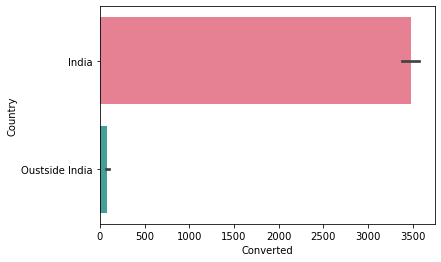

In [17]:
# Plotting Country variable  
sns.barplot(y='Country', x='Converted', palette='husl', data=df, estimator=np.sum)

- As you you can see number of values for India is very high when compare to other countries hence it's good to drop this column

In [18]:
# creating a list of columns that we need to drop, so we can drop all this columns at the end.
drop_cols = ['Country']

In [19]:
df.Specialization.value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [20]:
# replacing select by nan
df = df.replace('Select',np.NaN)

In [21]:
df.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
# replacing NaN values with Not specified
df.Specialization.fillna('Not specified', inplace=True)

In [23]:
# As you can see in the above data all the managements can be bought into one.
df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

In [24]:
df.Specialization.value_counts(dropna=False)

Management_Specializations           4253
Not specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

<AxesSubplot:xlabel='Converted', ylabel='Specialization'>

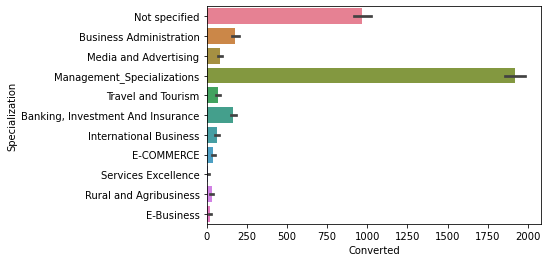

In [25]:
# Plotting Specialization variable  
sns.barplot(y='Specialization', x='Converted', palette='husl', data=df, estimator=np.sum)

In [26]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [27]:
#droping null values greaker than 40%
cols = df.columns
for i in cols:
    if(100*(df[i].isnull().sum()/len(df.index)) >=40):
        df.drop(i,1,inplace=True)

In [28]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [29]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [30]:
#We can replace null values with mode i.e. unemployed
df['What is your current occupation'].fillna('Unemployed', inplace=True)

<AxesSubplot:xlabel='Converted', ylabel='What is your current occupation'>

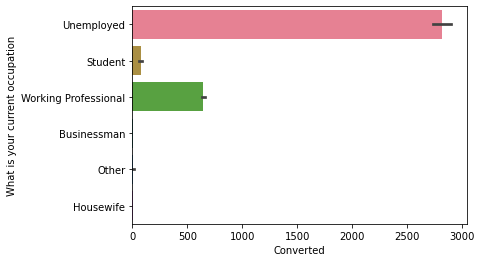

In [31]:
# Plotting What is your current occupation variable  
sns.barplot(y='What is your current occupation', x='Converted', palette='husl', data=df, estimator=np.sum)

In [32]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
# As we can see most of the people opted for better career prospects so we can replace it with same
df['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

In [34]:
df['What matters most to you in choosing a course'].isna().sum()

0

<AxesSubplot:xlabel='Converted', ylabel='What matters most to you in choosing a course'>

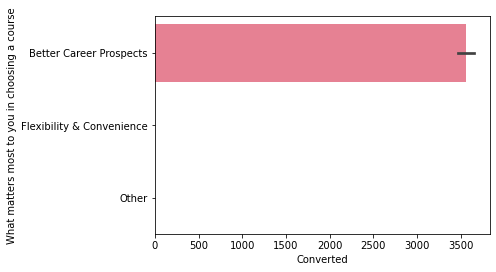

In [35]:
# Plotting What is your current occupation variable  
sns.barplot(y='What matters most to you in choosing a course', x='Converted', palette='husl', data=df, estimator=np.sum)

In [36]:
# From above plot What is your current occupation variable is worth dropping.
drop_cols.append('What matters most to you in choosing a course')

In [37]:
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [38]:
df.Tags.fillna('Not Specified', inplace=True)

In [39]:
# Replacing low frequency Tags with Others Tags
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                       'invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')


<AxesSubplot:xlabel='Converted', ylabel='Tags'>

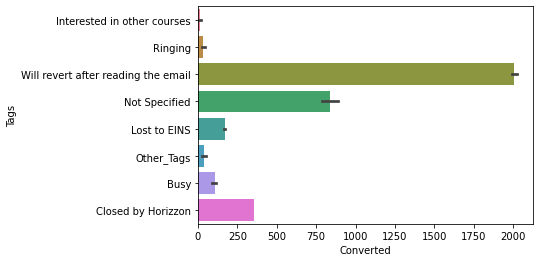

In [40]:
# Plotting Tags variable  
sns.barplot(y='Tags', x='Converted', palette='husl', data=df, estimator=np.sum)

In [41]:
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [42]:
df.City.fillna('Mumbai', inplace=True)

In [43]:
df['City'].isna().sum()

0

<AxesSubplot:xlabel='Converted', ylabel='City'>

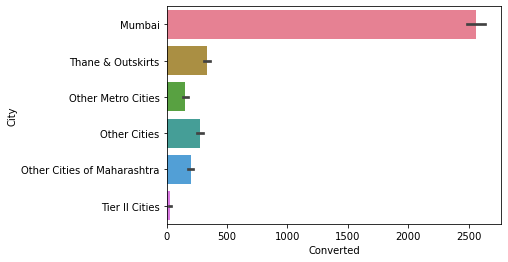

In [44]:
# Plotting City variable  
sns.barplot(y='City', x='Converted', palette='husl', data=df, estimator=np.sum)

In [45]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [46]:
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
testone                 1
welearnblog_Home        1
blog                    1
NC_EDM                  1
Pay per Click Ads       1
youtubechannel          1
WeLearn                 1
Name: Lead Source, dtype: int64

In [47]:
# Replacing low freqency Lead Source into others.
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Others')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')

In [48]:
#Replacing missing values with others
df['Lead Source'].fillna('Others', inplace=True)

In [49]:
df['Lead Source'].isna().sum()

0

In [50]:
# TotalVisits & Page Views Per Visit are numerical variabes can be replaced with median
df['TotalVisits'].replace(np.NaN, df['TotalVisits'].median(), inplace=True)
df['Page Views Per Visit'].replace(np.NaN, df['Page Views Per Visit'].median(), inplace=True)

In [51]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [52]:
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                    'View in browser link Clicked', 'Email Marked Spam','Email Received',
                                                   'Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

In [53]:
df['Last Activity'].fillna('Others', inplace=True)

In [54]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [55]:
df['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [56]:
df['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [57]:
# As we can see Do not call column has imbalnce data so it is worth dropping
drop_cols.append('Do Not Call')

In [58]:
df['Converted'].value_counts(dropna=False)

0    5679
1    3561
Name: Converted, dtype: int64

In [59]:
df['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [60]:
df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [61]:
df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [62]:
df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [63]:
df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [64]:
df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [65]:
df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [66]:
df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [67]:
df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [68]:
df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [69]:
df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [70]:
# Adding all the columns which are worth dropping.
drop_cols.extend(['Search','Newspaper Article','X Education Forums','Magazine','Digital Advertisement',
                  'Through Recommendations','Newspaper','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content','Get updates on DM Content',
                  'I agree to pay the amount through cheque'])

In [71]:
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Form Submitted on Website          1
Resubscribed to emails             1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [72]:
#clubbing lower frequency values
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                   'Unreachable','Unsubscribed','Email Bounced',                                                                    
                                                                    'Resubscribed to emails','View in browser link Clicked',
                                                                    'Approached upfront', 'Form Submitted on Website', 
                                                                    'Email Received'],'Other_Notable_activity')

In [73]:
df['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [74]:
drop_cols

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Magazine',
 'Digital Advertisement',
 'Through Recommendations',
 'Newspaper',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [75]:
#Dropping columns
df = df.drop(drop_cols,1)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Specialization                          9240 non-null   obje

### Step 3: Outlier Traetment

- TotalVisits

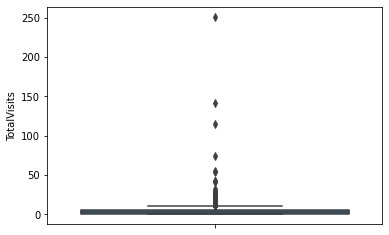

In [77]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [78]:
# Checking the distributon of Total Visits
df['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [79]:
# Removing top & bottom 2% of the variable
Q3 = df.TotalVisits.quantile(0.98)
Q1 = df.TotalVisits.quantile(0.02)
df = df[(df['TotalVisits']<=Q3)]
df = df[(df['TotalVisits']>=Q1)]

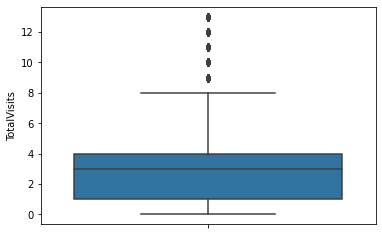

In [80]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

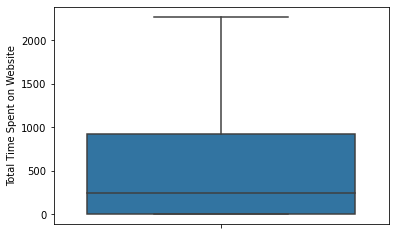

In [81]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

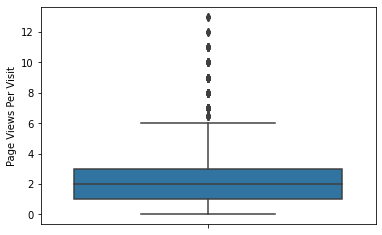

In [82]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

In [83]:
df['Page Views Per Visit'].describe()

count    9066.000000
mean        2.298612
std         1.979081
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: Page Views Per Visit, dtype: float64

In [84]:
# Removing top & bottom 2% of the variable
Q3 = df['Page Views Per Visit'].quantile(0.99)
Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[(df['Page Views Per Visit']<=Q3)]
df = df[(df['Page Views Per Visit']>=Q1)]

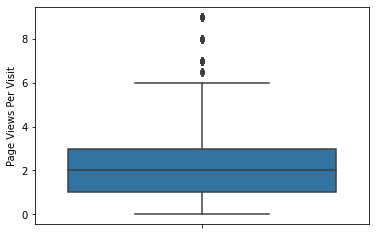

In [85]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

In [86]:
df.shape

(9015, 16)

- Numerical column analysis

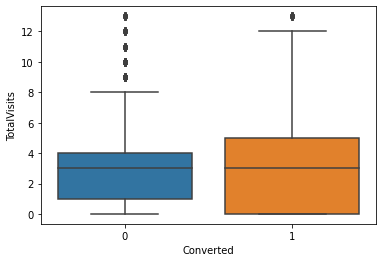

In [87]:
sns.boxplot(x=df.Converted, y=df['TotalVisits'])
plt.show()

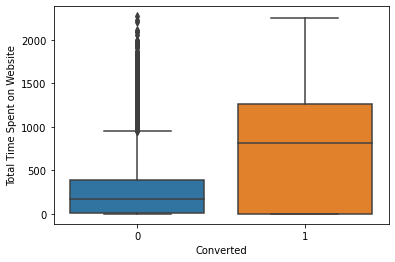

In [88]:
sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

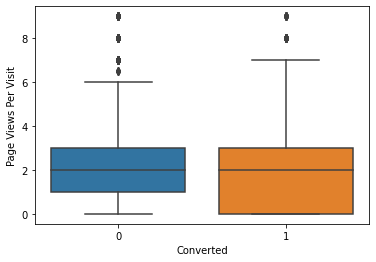

In [89]:
sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

- From above box plot of numerical variables it seems People who spend more time on website are more likely to get converted into leads.

#### Correlation Matrix

In [90]:
corr = df.corr()
corr

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.026670,0.052300,0.021346,0.060879
Converted,0.026670,1.000000,0.043805,0.358538,-0.007357
TotalVisits,0.052300,0.043805,1.000000,0.355323,0.756926
Total Time Spent on Website,0.021346,0.358538,0.355323,1.000000,0.346034
Page Views Per Visit,0.060879,-0.007357,0.756926,0.346034,1.000000


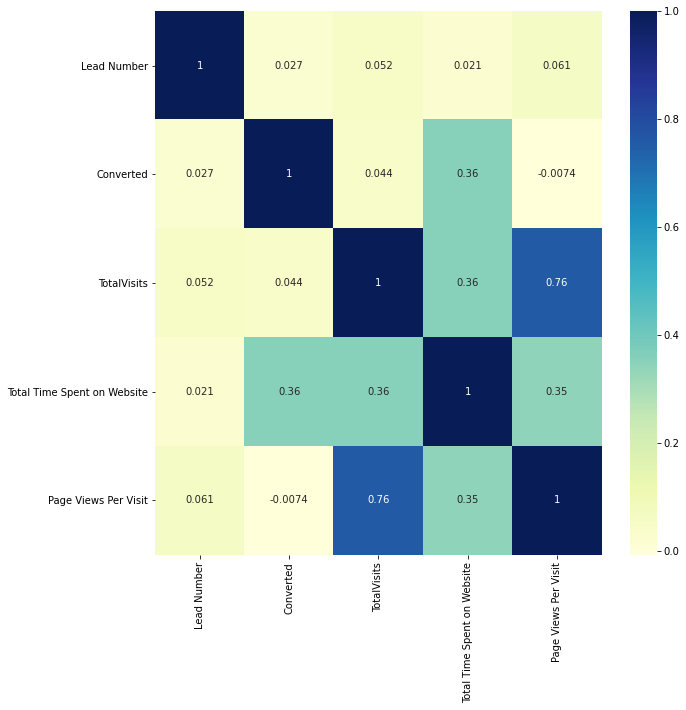

In [91]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='YlGnBu', annot=True)
plt.show()

In [92]:
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Not specified,Unemployed,Not Specified,Mumbai,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,1,2.0,1640,2.0,Email Opened,Management_Specializations,Unemployed,Will revert after reading the email,Mumbai,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,0,0.0,0,0.0,Olark Chat Conversation,Not specified,Unemployed,Not Specified,Mumbai,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,0,2.0,71,2.0,Email Opened,Management_Specializations,Unemployed,Not Specified,Thane & Outskirts,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,0,4.0,58,4.0,Email Opened,Management_Specializations,Unemployed,Not Specified,Mumbai,No,Email Opened


In [93]:
#list of categorical columns
categorical = df.select_dtypes(include=['object']).columns
categorical

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [94]:
# We should change all yes and no to 1 and 0's
var_list = ['Do Not Email','A free copy of Mastering The Interview']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
df[var_list] = df[var_list].apply(binary_map)

In [95]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not specified,Unemployed,Interested in other courses,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not specified,Unemployed,Ringing,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not specified,Unemployed,Will revert after reading the email,Mumbai,0,Modified


#### Creating dummy variables

In [96]:
#getting dummies and dropping the first column and adding the results to df
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)
df = pd.concat([df,dummy],1)

In [97]:
df.shape

(9015, 30)

In [98]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [99]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [100]:
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not specified'], 1)
df = pd.concat([df, dummy], axis = 1)

In [101]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
df = pd.concat([df, dummy], axis = 1)

In [102]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
df = pd.concat([df, dummy], axis = 1)

In [103]:
df.drop(categorical,1,inplace=True)
df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,...,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9015 entries, 0 to 9239
Data columns (total 60 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9015 non-null   int64  
 1   Converted                                             9015 non-null   int64  
 2   TotalVisits                                           9015 non-null   float64
 3   Total Time Spent on Website                           9015 non-null   int64  
 4   Page Views Per Visit                                  9015 non-null   float64
 5   Lead Origin_Landing Page Submission                   9015 non-null   uint8  
 6   Lead Origin_Lead Add Form                             9015 non-null   uint8  
 7   Lead Origin_Lead Import                               9015 non-null   uint8  
 8   Lead Origin_Quick Add Form                            9015

### Logistic Regression

#### Splitting the data into test and train

In [105]:
y = df.Converted
X =df.drop('Converted', axis=1)

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling Data

In [107]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
num_cols = X_train.select_dtypes(include=['float64','int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
6804,-0.840425,-0.016875,-0.785601,-0.404001,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6592,-0.772027,-0.016875,0.106052,-0.404001,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4921,-0.189412,-0.390500,-0.572778,-0.135630,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9224,-1.606683,0.356749,-0.049896,0.937854,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5678,-0.459315,-0.016875,-0.229694,0.401112,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Feature selection using RFE

In [108]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [110]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,18)
rfe = rfe.fit(X_train, y_train)

In [111]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 30),
 ('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('Lead Origin_Quick Add Form', False, 42),
 ('What is your current occupation_Housewife', False, 22),
 ('What is your current occupation_Other', False, 37),
 ('What is your current occupation_Student', False, 14),
 ('What is your current occupation_Unemployed', False, 3),
 ('What is your current occupation_Working Professional', False, 21),
 ('City_Other Cities', False, 33),
 ('City_Other Cities of Maharashtra', False, 28),
 ('City_Other Metro Cities', False, 27),
 ('City_Thane & Outskirts', False, 32),
 ('City_Tier II Cities', False, 9),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', False, 16),
 ('Lead Source_Organic Sea

In [112]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [113]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Social Media',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
   

In [114]:
import statsmodels.api as sm

In [116]:
# logistic regression model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6291
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1252.7
Date:                Wed, 28 Sep 2022   Deviance:                       2505.4
Time:                        22:52:47   Pearson chi2:                 1.01e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4157      0.126     -3.288      0.001      -0.663      -0.168
Total Time Spent on Website                  1.0584      0.061     17.402      0.000       0.939       1.178
Lead Origin_Lead Add Form                    2.3240      0.772      3.010      0.003       0.811       3.837
Lead Source_Direct Traffic                  -1.4939      0.172     -8.664      0.000      -1.832      -1.156
Lead Source_Google                          -1.1077      0.158     -7.005      0.000      -1.418      -0.798
Lead Source_Organic Search                  -1.2320      0.206     -5.994      0.000      -1.635      -0.829
Lead Source_Reference                       -2.3176      0.846     -2.738      0.006      -3.977      -0.659
Lead Source_Referral Sites                  -1.2086      0.504     -2.397      0.017      -2.197      -0.220
Lead Source_Welingak Website                 2.1443      1.054      2.034      0.042       0.078       4.211
Last Activity_Email Bounced                 -1.6918      0.450     -3.761      0.000      -2.573      -0.810
Last Activity_Olark Chat Conversation       -1.2477      0.234     -5.328      0.000      -1.707      -0.789
Tags_Closed by Horizzon                      6.4610      0.737      8.763      0.000       5.016       7.906
Tags_Interested in other courses            -2.1535      0.409     -5.269      0.000      -2.955      -1.352
Tags_Lost to EINS                            5.4186      0.534     10.154      0.000       4.373       6.464
Tags_Other_Tags                             -2.5523      0.220    -11.622      0.000      -2.983      -2.122
Tags_Ringing                                -3.6833      0.265    -13.893      0.000      -4.203      -3.164
Tags_Will revert after reading the email     4.3305      0.183     23.691      0.000       3.972       4.689
Last Notable Activity_Modified              -0.7840      0.135     -5.824      0.000      -1.048      -0.520
Last Notable Activity_SMS Sent               2.2151      0.134     16.498      0.000       1.952       2.478
============================================================================================================
"""

In [117]:
#lets drop Lead Source_Welingak Website column
col = col.drop('Lead Source_Welingak Website')

In [119]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6310
Model:                            GLM   Df Residuals:                     6292
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.9
Date:                Wed, 28 Sep 2022   Deviance:                       2509.8
Time:                        22:53:09   Pearson chi2:                 1.02e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4107      0.126     -3.250      0.001      -0.658      -0.163
Total Time Spent on Website                  1.0585      0.061     17.381      0.000       0.939       1.178
Lead Origin_Lead Add Form                    3.6980      0.477      7.748      0.000       2.763       4.633
Lead Source_Direct Traffic                  -1.4911      0.172     -8.645      0.000      -1.829      -1.153
Lead Source_Google                          -1.1069      0.158     -6.998      0.000      -1.417      -0.797
Lead Source_Organic Search                  -1.2286      0.206     -5.975      0.000      -1.632      -0.826
Lead Source_Reference                       -3.6888      0.592     -6.228      0.000      -4.850      -2.528
Lead Source_Referral Sites                  -1.2109      0.504     -2.401      0.016      -2.199      -0.223
Last Activity_Email Bounced                 -1.8094      0.451     -4.016      0.000      -2.692      -0.926
Last Activity_Olark Chat Conversation       -1.2474      0.234     -5.326      0.000      -1.706      -0.788
Tags_Closed by Horizzon                      6.4686      0.737      8.771      0.000       5.023       7.914
Tags_Interested in other courses            -2.1521      0.409     -5.265      0.000      -2.953      -1.351
Tags_Lost to EINS                            5.4270      0.534     10.159      0.000       4.380       6.474
Tags_Other_Tags                             -2.5543      0.220    -11.630      0.000      -2.985      -2.124
Tags_Ringing                                -3.7051      0.267    -13.879      0.000      -4.228      -3.182
Tags_Will revert after reading the email     4.3316      0.183     23.666      0.000       3.973       4.690
Last Notable Activity_Modified              -0.7935      0.134     -5.906      0.000      -1.057      -0.530
Last Notable Activity_SMS Sent               2.2093      0.134     16.476      0.000       1.947       2.472
============================================================================================================
"""

#### Checking for VIF's

In [120]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,4.14
5,Lead Source_Reference,4.02
15,Last Notable Activity_Modified,2.09
2,Lead Source_Direct Traffic,1.86
14,Tags_Will revert after reading the email,1.83
3,Lead Source_Google,1.79
16,Last Notable Activity_SMS Sent,1.62
12,Tags_Other_Tags,1.41
4,Lead Source_Organic Search,1.37
13,Tags_Ringing,1.37


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [122]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.06103613, 0.88195831, 0.10679828, 0.01081426, 0.0644114 ,
       0.74473237, 0.58287911, 0.96427748, 0.98571078, 0.01806779])

In [123]:
#Creating a dataframe with converted, probability of conversion and Prospec ID
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred, 'Prospect ID':y_train.index})
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.061036,6804
1,0,0.881958,6592
2,0,0.106798,4921
3,0,0.010814,9224
4,0,0.064411,5678


In [124]:
# Creating new column where the conversion prob is >0.5 as 1 and <0.5 as 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.061036,6804,0
1,0,0.881958,6592,1
2,0,0.106798,4921,0
3,0,0.010814,9224,0
4,0,0.064411,5678,0


In [125]:
from sklearn import metrics

In [126]:
# Let's check overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9282091917591125


## Metrics beyond simply accuracy

In [127]:
# Now let's look at the confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3741,  161],
       [ 292, 2116]], dtype=int64)

In [128]:
# Actual/Predicted     not_converted    converted
        # not_converted        3741      161
        # converted            292       2116 

In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8787375415282392

In [131]:
# Let us calculate specificity
TN / float(TN+FP)

0.9587391081496668

In [132]:
# Calculate false postive rate - predicting converted when visitors have not converted
print(FP/ float(TN+FP))

0.041260891850333166


In [133]:
# positive predictive value 
print (TP / float(TP+FP))

0.9292929292929293


In [134]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9275973220927349


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [135]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [136]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

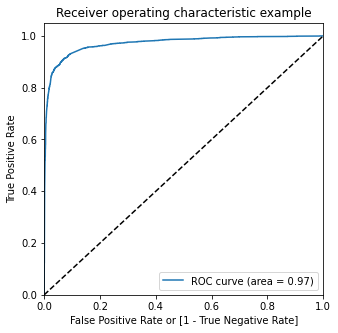

In [137]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [138]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.061036,6804,0,1,0,0,0,0,0,0,0,0,0
1,0,0.881958,6592,1,1,1,1,1,1,1,1,1,1,0
2,0,0.106798,4921,0,1,1,0,0,0,0,0,0,0,0
3,0,0.010814,9224,0,1,0,0,0,0,0,0,0,0,0
4,0,0.064411,5678,0,1,0,0,0,0,0,0,0,0,0


In [139]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381616  1.000000  0.000000
0.1   0.1  0.838352  0.969684  0.757304
0.2   0.2  0.894929  0.951827  0.859815
0.3   0.3  0.921395  0.914867  0.925423
0.4   0.4  0.924723  0.898671  0.940800
0.5   0.5  0.928209  0.878738  0.958739
0.6   0.6  0.927417  0.859219  0.969503
0.7   0.7  0.924406  0.841777  0.975397
0.8   0.8  0.909192  0.789452  0.983086
0.9   0.9  0.886371  0.716777  0.991030


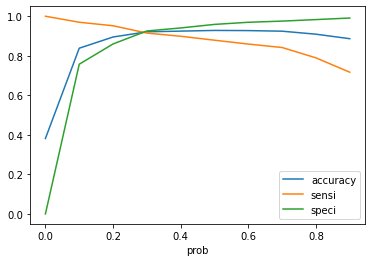

In [140]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [141]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.061036,6804,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.881958,6592,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.106798,4921,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.010814,9224,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.064411,5678,0,1,0,0,0,0,0,0,0,0,0,0


In [142]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9213946117274168

In [143]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3611,  291],
       [ 205, 2203]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9148671096345515

In [146]:
# Let us calculate specificity
TN / float(TN+FP)

0.9254228600717581

In [147]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07457713992824193


In [148]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8833199679230153


In [149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9462788259958071


### Inference

- The area under ROC curve is 0.97 which is pretty good.
- Accuracy = 92.14%
- Sensitivity = 91.49%
- Specificity - 92.54%

## Precision and Recall

In [150]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3741,  161],
       [ 292, 2116]], dtype=int64)

##### Precision
TP / TP + FP

In [151]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9292929292929293

##### Recall
TP / TP + FN

In [152]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8787375415282392

Using sklearn utilities for the same

In [153]:
from sklearn.metrics import precision_score, recall_score

In [154]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9292929292929293

In [155]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8787375415282392

### Precision and recall tradeoff

In [156]:
from sklearn.metrics import precision_recall_curve

In [157]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

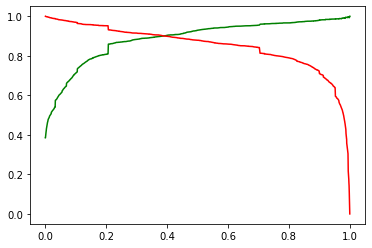

In [158]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the test set

In [ ]:
num_cols = X_test.select_dtypes(include=['float64','int64']).columns
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

In [ ]:
X_test = X_test[col]
X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Let's see the head
y_test_df.head()

In [ ]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]


In [ ]:
y_pred_final.head()

In [ ]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x : 1 if x>0.3 else 0)
y_pred_final.head()

In [ ]:
# Lets check the accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

In [ ]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted)
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

In [ ]:
recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

### Inference

#### Train Data

- Accuracy: 92.14%

- Sensitivity: 91.49%

- Specificity: 92.54%

#### Test Data

- Accuracy: 96.06%

- Sensitivity: 91.27%

- Specificity: 93.45%